In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Health_insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
import plotly.express as px

In [9]:

data = df
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

In [10]:
# map to convert 'sex' and 'smoker column to numbers
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 0, 'no': 1})


In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


<Axes: >

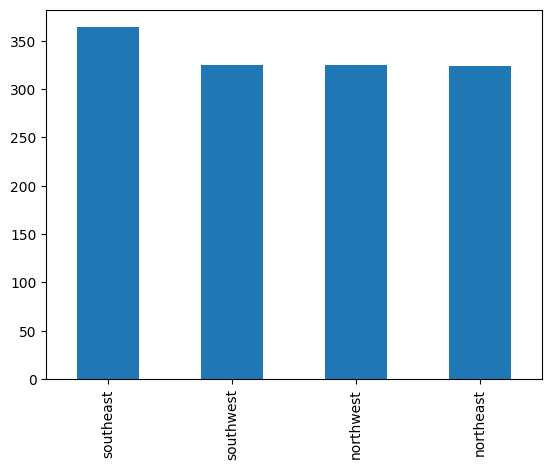

In [13]:
#distribution of region with plot
df["region"].value_counts().plot(kind="bar")


<ipython-input-16-c10a23c44e41>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

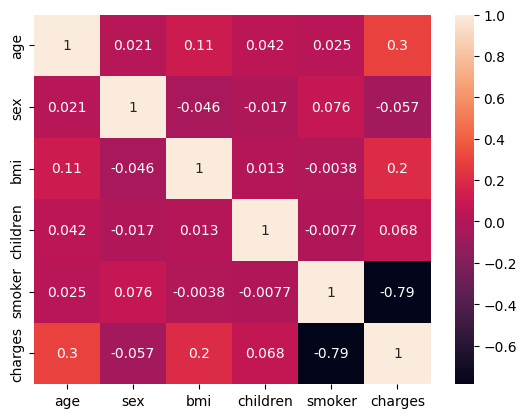

In [16]:
sns.heatmap(df.corr(),annot=True,)

In [20]:
df = df.drop(['region'],axis=1)
df

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,0,16884.92400
1,18,0,33.770,1,1,1725.55230
2,28,0,33.000,3,1,4449.46200
3,33,0,22.705,0,1,21984.47061
4,32,0,28.880,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830
1334,18,1,31.920,0,1,2205.98080
1335,18,1,36.850,0,1,1629.83350
1336,21,1,25.800,0,1,2007.94500


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

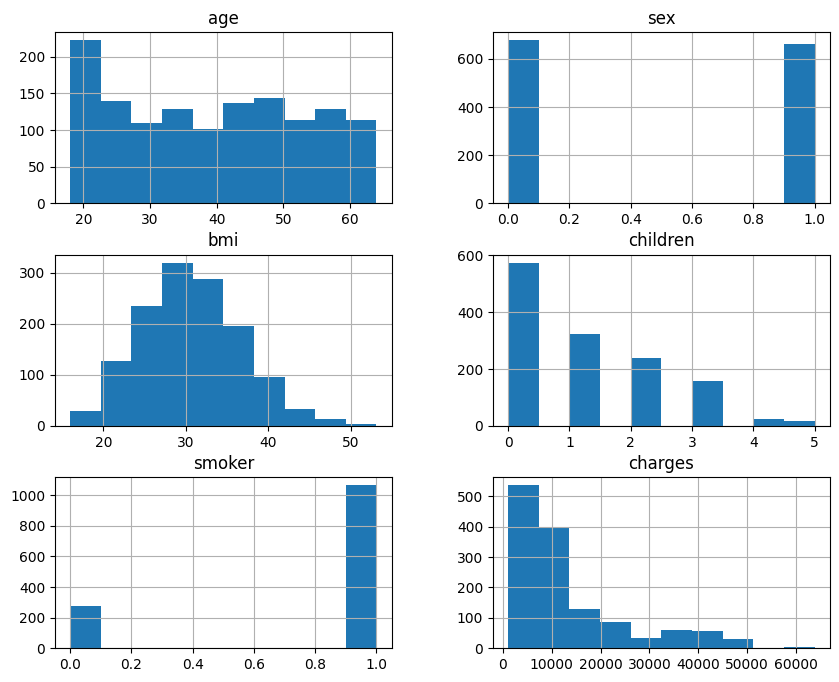

In [29]:
df.hist(figsize=(10, 8))

In [62]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [63]:
X

array([[19.  ,  1.  , 27.9 ,  0.  ,  0.  ],
       [18.  ,  0.  , 33.77,  1.  ,  1.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  1.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  1.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  0.  ]])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
X_train.shape

(1070, 5)

[0.13491355 0.0064956  0.23178334 0.02197731 0.6048302 ]


<Axes: >

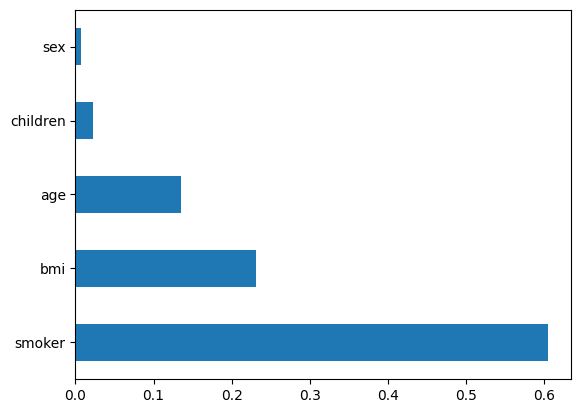

In [67]:
# feature selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
tree = RandomForestRegressor()
tree.fit(X_train, y_train)
print (tree.feature_importances_)
feature_imp = pd.Series(tree.feature_importances_, index = df.iloc[:,:-1].columns)
feature_imp.nlargest(5).plot(kind = 'barh')

In [68]:
# model training

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mse)
print(r2_score(y_test, y_pred))


20301432.678675964
0.8724223120371265


In [69]:
# adjusted r2 score

adjusted_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_r2)

0.8719434168120406


In [71]:
# model prediction

print(regressor.predict([[19, 1, 27.9, 0, 0]]))



[17052.1747348]
